TP1 : expériences préliminaires
===============================

In [1]:
import numpy as np
from numpy.random import Generator, PCG64
import matplotlib.pyplot as plt
import math
import time
from heateq import Exact, Simulateur

In [2]:
seed = 213731490053398181466621250222036675538
rng = Generator(PCG64(seed))

In [3]:
# Permet d'obtenir un n-échantillon du vecteur aléatoire d'entrée X
def n_echantillon_X(n):
    return np.vstack(
        (
            rng.uniform(-math.pi, math.pi, (3, n)),
            rng.uniform(0.001, 0.009, (1, n)), 
            rng.uniform(-1., 1., (3, n))
        )
    )

In [4]:
# Simulateurs haute et basse fidélité
f = Simulateur(21, 100)
g = Simulateur(3, 20)

In [5]:
# Espérance exacte de la solution continue
mu_exact = Exact().mu
print("Espérance exacte de la solution continue:", mu_exact)

# Espérance exacte de Y = f(X) (solution discrétisée, haute fidélité)
mu_Y_exact = f.mu
print("Espérance exacte de Y = f(X):", mu_Y_exact)

# Espérance exacte de Z = g(X) (solution discrétisée, basse fidélité)
mu_Z_exact = g.mu
print("Espérance exacte de Z = g(X):", mu_Z_exact)

Espérance exacte de la solution continue: 41.98447216482205
Espérance exacte de Y = f(X): 41.916465294707976
Espérance exacte de Z = g(X): 33.03617206344313


# Expériences numériques

Déduire de `mu_exact`, `mu_Y_exact` et `mu_Z_exact` le biais de l'estimateur Monte Carlo classique de l'espérance de $f(\mathbf{X})$ et $g(\mathbf{X})$.

Lancer les simulateurs sur un nombre élevé de réalisations (par exemple 50000 ou 100000 si la mémoire de votre ordinateur le permet).

Les simulateurs `f` et `g` peuvent être évalués par exemple `f(X)` et `g(X)`.

Estimer $w=\dfrac{\mathbb{E}[\operatorname{cost}(g(\mathbf{X}))]}{\mathbb{E}[\operatorname{cost}(f(\mathbf{X}))]}$. Vous pouvez utiliser, par exemple, la fonction `time.process_time()`. Est-ce consistant avec la valeur attendue ?

In [6]:
# Biais des estimateurs Monte Carlo
bias_Y = mu_Y_exact - mu_exact
bias_Z = mu_Z_exact - mu_exact
print("Biais de l'estimateur Monte Carlo pour Y:", bias_Y)
print("Biais de l'estimateur Monte Carlo pour Z:", bias_Z)

Biais de l'estimateur Monte Carlo pour Y: -0.06800687011407547
Biais de l'estimateur Monte Carlo pour Z: -8.94830010137892


In [7]:
# Estimation du coût relatif des simulateurs
def estimate_cost(simulator, X):
    start_time = time.process_time()
    simulator(X)
    end_time = time.process_time()
    return end_time - start_time

In [8]:
n = 100000
X = n_echantillon_X(n)

In [9]:
cost_f = estimate_cost(f, X)
cost_g = estimate_cost(g, X)
w = cost_g / cost_f
print("Estimation de w:", w)

Estimation de w: 0.024367562276814476


Pour $n \in \{10; 20; 50; 100; 200; 500; 1000; 2000; 5000; 10000\}$, estimer `nr = 500` fois la moyenne empirique (Monte Carlo) de $Y=f(\mathbf{X})$, $Z=g(\mathbf{X})$ et estimer l'espéance, l'écart-type et la racine de l'erreur quadratique moyenne (REQM) des estimateurs.

Tracer l'espérance et l'écart-type des estimateurs haute et basse fidélité en fonction de $n$. Sur un autre graphe, tracer l'évolution de la REQM des estimateurs en fonction de $n$.

In [ ]:
# Expériences numériques
nr = 500
n_samples = [5, 10, 20, 50, 100, 200, 1000, 2000, 5000, 10000]

In [11]:
# Estimation des moyennes empiriques et des erreurs
def monte_carlo_estimates(simulator, n_samples, nr):
    means = []
    stds = []
    rmse = []
    for n in n_samples:
        estimates = []
        for _ in range(nr):
            X = n_echantillon_X(n)
            estimates.append(np.mean(simulator(X)))
        mean = np.mean(estimates)
        std = np.std(estimates)
        rmse_value = np.sqrt(np.mean((estimates - simulator.mu) ** 2))
        means.append(mean)
        stds.append(std)
        rmse.append(rmse_value)
    return means, stds, rmse

means_Y, stds_Y, rmse_Y = monte_carlo_estimates(f, n_samples, nr)
means_Z, stds_Z, rmse_Z = monte_carlo_estimates(g, n_samples, nr)

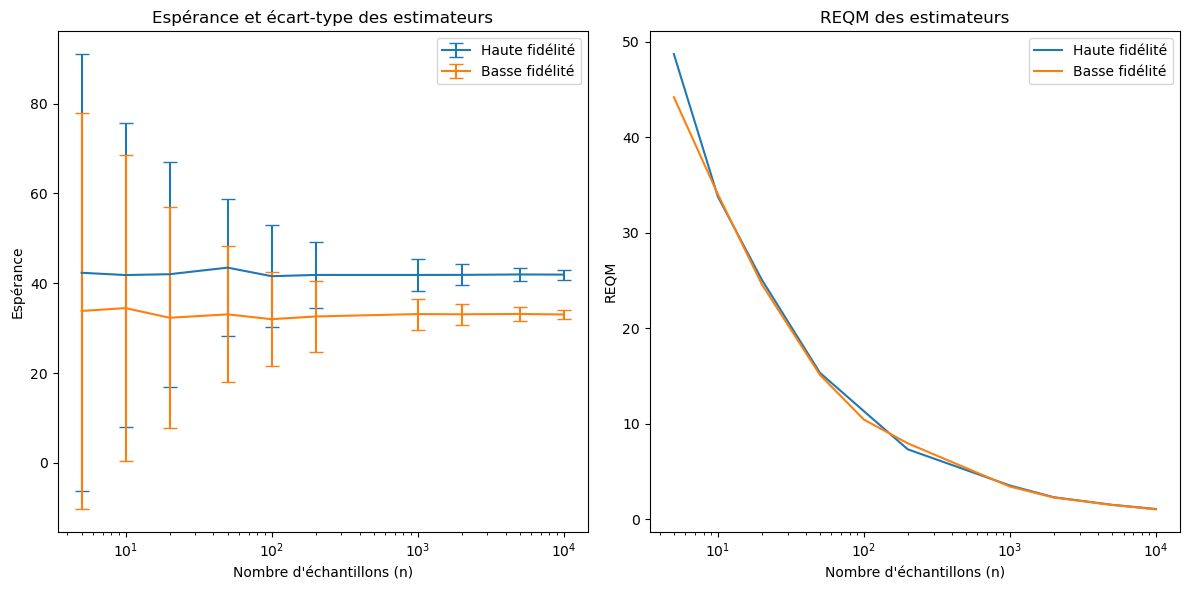

In [12]:
# Tracé des résultats
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.errorbar(n_samples, means_Y, yerr=stds_Y, label='Haute fidélité', capsize=5)
plt.errorbar(n_samples, means_Z, yerr=stds_Z, label='Basse fidélité', capsize=5)
plt.xscale('log')
plt.xlabel('Nombre d\'échantillons (n)')
plt.ylabel('Espérance')
plt.legend()
plt.title('Espérance et écart-type des estimateurs')

plt.subplot(1, 2, 2)
plt.plot(n_samples, rmse_Y, label='Haute fidélité')
plt.plot(n_samples, rmse_Z, label='Basse fidélité')
plt.xscale('log')
plt.xlabel('Nombre d\'échantillons (n)')
plt.ylabel('REQM')
plt.legend()
plt.title('REQM des estimateurs')

plt.tight_layout()
plt.show()